In [1]:
# 주로 사용하는 코드 2 : 인식한 GPU 개수 출력
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
def load_mnist_dataset():  
  (train_validation_images, train_validation_labels), (test_images, test_labels) \
    = mnist.load_data()

  train_validation_images = train_validation_images.reshape(-1,28,28,1)
  test_images = test_images.reshape(-1,28,28,1)
  
  train_validation_images = train_validation_images / 255.
  test_images = test_images / 255.

  n_train_validation = train_validation_images.shape[0]
  train_ratio = 0.8
  n_train = int(n_train_validation * train_ratio)

  train_x = train_validation_images[:n_train]
  train_y = train_validation_labels[:n_train]
  validation_x = train_validation_images[n_train:]
  validation_y = train_validation_labels[n_train:]
  test_x = test_images
  test_y = test_labels
  
  print('Train set')
  print('Image :', train_x.shape)
  print('Label :', train_y.shape)
  print('Validation set')
  print('Image :', validation_x.shape)
  print('Label :', validation_y.shape)
  print('Train & validation set')
  print('Image :', test_x.shape)
  print('Label :', test_y.shape)

  return train_x, train_y, validation_x, validation_y, test_x, test_y

In [3]:
train_x, train_y, validation_x, validation_y, test_x, test_y = load_mnist_dataset()

Train set
Image : (48000, 28, 28, 1)
Label : (48000,)
Validation set
Image : (12000, 28, 28, 1)
Label : (12000,)
Train & validation set
Image : (10000, 28, 28, 1)
Label : (10000,)


In [4]:
model = Sequential()
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=36, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=48, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=60, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=72, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [5]:
x = tf.random.uniform(shape=(1,28,28,1))
for layer in model.layers:
    x=layer(x)
    print(layer.__class__.__name__, 'output shape:\t',x.shape)

Conv2D output shape:	 (1, 28, 28, 24)
BatchNormalization output shape:	 (1, 28, 28, 24)
Conv2D output shape:	 (1, 28, 28, 36)
BatchNormalization output shape:	 (1, 28, 28, 36)
Conv2D output shape:	 (1, 28, 28, 48)
BatchNormalization output shape:	 (1, 28, 28, 48)
MaxPooling2D output shape:	 (1, 14, 14, 48)
Conv2D output shape:	 (1, 14, 14, 60)
BatchNormalization output shape:	 (1, 14, 14, 60)
MaxPooling2D output shape:	 (1, 7, 7, 60)
Conv2D output shape:	 (1, 7, 7, 72)
BatchNormalization output shape:	 (1, 7, 7, 72)
MaxPooling2D output shape:	 (1, 3, 3, 72)
Flatten output shape:	 (1, 648)
Dense output shape:	 (1, 128)
Dropout output shape:	 (1, 128)
Dense output shape:	 (1, 10)


In [6]:
history = model.fit(train_x, train_y, batch_size=9, epochs=20,\
                    verbose=2, validation_data=(validation_x, validation_y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 17s - loss: 0.2155 - accuracy: 0.9383 - val_loss: 0.0771 - val_accuracy: 0.9799
Epoch 2/20
48000/48000 - 15s - loss: 0.0996 - accuracy: 0.9738 - val_loss: 0.0613 - val_accuracy: 0.9846
Epoch 3/20
48000/48000 - 15s - loss: 0.0732 - accuracy: 0.9808 - val_loss: 0.0392 - val_accuracy: 0.9899
Epoch 4/20
48000/48000 - 15s - loss: 0.0603 - accuracy: 0.9842 - val_loss: 0.0347 - val_accuracy: 0.9911
Epoch 5/20
48000/48000 - 15s - loss: 0.0493 - accuracy: 0.9863 - val_loss: 0.0493 - val_accuracy: 0.9882
Epoch 6/20
48000/48000 - 15s - loss: 0.0435 - accuracy: 0.9884 - val_loss: 0.0428 - val_accuracy: 0.9901
Epoch 7/20
48000/48000 - 15s - loss: 0.0395 - accuracy: 0.9891 - val_loss: 0.0370 - val_accuracy: 0.9915
Epoch 8/20
48000/48000 - 15s - loss: 0.0342 - accuracy: 0.9912 - val_loss: 0.0484 - val_accuracy: 0.9898
Epoch 9/20
48000/48000 - 15s - loss: 0.0294 - accuracy: 0.9919 - val_loss: 0.0431 - val_accuracy: 0.9920
Epoch

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  240       
_________________________________________________________________
batch_normalization (BatchNo multiple                  96        
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  7812      
_________________________________________________________________
batch_normalization_1 (Batch multiple                  144       
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  15600     
_________________________________________________________________
batch_normalization_2 (Batch multiple                  192       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0

C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


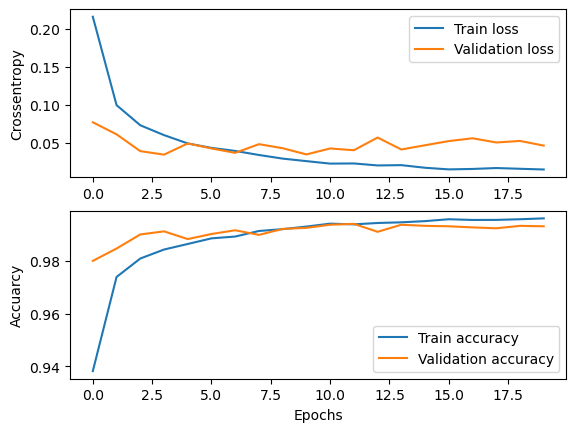

In [8]:
fig, axes = plt.subplots(2,1)

axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].set_ylabel('Accuarcy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()

In [9]:
result= model.evaluate(test_x, test_y, verbose=2)

print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'.format(result[0], result[1]*100))

10000/10000 - 1s - loss: 0.0316 - accuracy: 0.9934
Test loss : 0.0316	 Test accuracy : 99.34%


In [10]:
layers=model.layers
print(layers)

[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CBDD48E888>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CBDD482308>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CBDD482E48>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CBDD486988>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CBDD486C48>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CBDD4BDA88>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001CBDD4BDB48>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CBDD4BF808>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CBDD452648>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001CBDD4C0F88>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CBDD4BF588>, <tensorflow.pyt

In [11]:
layers[0].get_weights()[0]

array([[[[ 2.97602206e-01, -5.11539839e-02, -2.09960654e-01,
          -1.27585053e-01,  6.01459146e-01, -2.35737130e-01,
          -2.42214829e-01, -7.89800435e-02,  2.09722847e-01,
          -1.45770162e-01, -5.32212675e-01, -1.82865083e-01,
           2.44286329e-01,  4.54746075e-02, -4.29797739e-01,
          -1.69931471e-01, -2.65855193e-01, -1.01098821e-01,
           7.11801350e-02,  5.77871352e-02,  3.74088764e-01,
          -2.51417190e-01, -4.47934777e-01, -1.50855646e-01]],

        [[-2.00749189e-01, -2.73648389e-02, -1.65824875e-01,
           5.85936382e-03,  7.63730705e-02, -2.99483925e-01,
           2.11383477e-01,  3.98819268e-01,  2.19998330e-01,
          -1.88074453e-04, -9.90873873e-02, -1.88581611e-03,
           2.75781661e-01, -1.13261960e-01, -2.50345498e-01,
           4.55268063e-02, -6.67385638e-01, -1.04032703e-01,
          -5.58108129e-02,  1.38481408e-01,  6.09017849e-01,
          -2.00393647e-01, -5.40378153e-01, -2.93218911e-01]],

        [[-6.64655

Probabilty is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


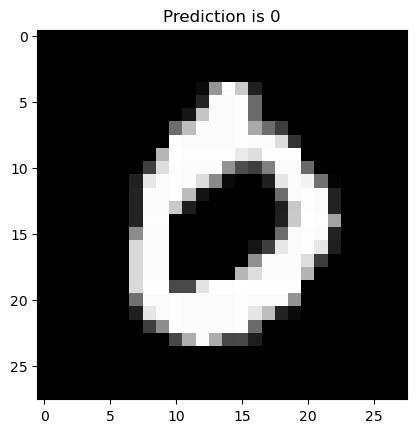

In [20]:
prediction = model.predict(test_x)
plt.imshow(test_x[3], 'gray')
print('Probabilty is {}'.format(prediction[3].round()))
plt.title('Prediction is {}'.format(np.argmax(prediction[3])))
plt.show()

In [13]:
layers=model.layers
print(layers)

[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CBDD48E888>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CBDD482308>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CBDD482E48>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CBDD486988>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CBDD486C48>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CBDD4BDA88>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001CBDD4BDB48>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CBDD4BF808>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CBDD452648>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001CBDD4C0F88>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CBDD4BF588>, <tensorflow.pyt

In [14]:
layers[0].get_weights()[0]

array([[[[ 2.97602206e-01, -5.11539839e-02, -2.09960654e-01,
          -1.27585053e-01,  6.01459146e-01, -2.35737130e-01,
          -2.42214829e-01, -7.89800435e-02,  2.09722847e-01,
          -1.45770162e-01, -5.32212675e-01, -1.82865083e-01,
           2.44286329e-01,  4.54746075e-02, -4.29797739e-01,
          -1.69931471e-01, -2.65855193e-01, -1.01098821e-01,
           7.11801350e-02,  5.77871352e-02,  3.74088764e-01,
          -2.51417190e-01, -4.47934777e-01, -1.50855646e-01]],

        [[-2.00749189e-01, -2.73648389e-02, -1.65824875e-01,
           5.85936382e-03,  7.63730705e-02, -2.99483925e-01,
           2.11383477e-01,  3.98819268e-01,  2.19998330e-01,
          -1.88074453e-04, -9.90873873e-02, -1.88581611e-03,
           2.75781661e-01, -1.13261960e-01, -2.50345498e-01,
           4.55268063e-02, -6.67385638e-01, -1.04032703e-01,
          -5.58108129e-02,  1.38481408e-01,  6.09017849e-01,
          -2.00393647e-01, -5.40378153e-01, -2.93218911e-01]],

        [[-6.64655

In [15]:
layers[0].get_weights()[0].shape

(3, 3, 1, 24)